In [1]:
#uploading the file

from google.colab import files
files.upload()

Saving spotify_churn_dataset.csv to spotify_churn_dataset.csv


{'spotify_churn_dataset.csv': b'user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned\nuser_1,Premium,US,134.9,4,Electronic,6,0,1,0\nuser_2,Premium,PK,165.7,5,Pop,8,0,12,0\nuser_3,Free,DE,45.9,3,Classical,3,0,3,0\nuser_4,Premium,PK,106.0,0,Jazz,7,0,3,0\nuser_5,Premium,US,89.6,5,Country,2,1,6,0\nuser_6,Free,IN,17.6,0,Rock,6,2,7,1\nuser_7,Free,UK,43.7,2,Hip-Hop,1,1,0,0\nuser_8,Premium,BR,131.3,3,Classical,7,0,1,0\nuser_9,Free,FR,41.9,5,Country,4,0,0,0\nuser_10,Free,DE,28.3,1,Electronic,6,0,10,0\nuser_11,Premium,UK,126.3,1,Country,1,0,34,1\nuser_12,Free,CA,65.9,2,Rock,7,0,25,1\nuser_13,Free,UK,56.5,1,Classical,0,0,17,1\nuser_14,Free,BR,38.4,0,Jazz,2,0,7,0\nuser_15,Premium,DE,129.7,4,Electronic,2,0,0,0\nuser_16,Free,US,78.4,3,Country,7,0,13,0\nuser_17,Free,RU,34.8,1,Electronic,5,0,4,0\nuser_18,Free,BR,89.3,1,Rock,3,0,3,0\nuser_19,Premium,FR,144.4,7,Electronic,4,0,1,0\nuser_20,Free,DE,90.1,3,Rock,7,0,8,1

In [2]:
#loading dataset into a dataframe

import pandas as pd
df= pd.read_csv('spotify_churn_dataset.csv')
df.describe()

,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,97.442100,3.434000,4.631000,0.232000,9.496000,0.186000
std,42.916587,2.324015,2.777148,0.514238,9.742017,0.389301
min,-37.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.900000,1.000000,3.000000,0.000000,2.000000,0.000000
50%,97.900000,3.000000,5.000000,0.000000,7.000000,0.000000
75%,129.750000,5.000000,6.000000,0.000000,14.000000,0.000000
max,237.800000,10.000000,14.000000,2.000000,58.000000,1.000000


In [3]:
#first 5 rows of the dataset

df.head()

,user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned
0,user_1,Premium,US,134.9,4,Electronic,6,0,1,0
1,user_2,Premium,PK,165.7,5,Pop,8,0,12,0
2,user_3,Free,DE,45.9,3,Classical,3,0,3,0
3,user_4,Premium,PK,106.0,0,Jazz,7,0,3,0
4,user_5,Premium,US,89.6,5,Country,2,1,6,0


In [4]:
#columns

df.columns

Index(['user_id', 'subscription_type', 'country', 'avg_daily_minutes',
       'number_of_playlists', 'top_genre', 'skips_per_day', 'support_tickets',
       'days_since_last_login', 'churned'],
      dtype='object')

In [5]:
#data structure

df.shape

(1000, 10)

In [6]:
#unique no. of elements in each column

for col in df.columns:
  col_cnt = df[col].nunique()
  print({col}, col_cnt)

{'user_id'} 1000
{'subscription_type'} 2
{'country'} 10
{'avg_daily_minutes'} 733
{'number_of_playlists'} 11
{'top_genre'} 7
{'skips_per_day'} 15
{'support_tickets'} 3
{'days_since_last_login'} 51
{'churned'} 2


In [7]:
print(df.nunique())

user_id                  1000
subscription_type           2
country                    10
avg_daily_minutes         733
number_of_playlists        11
top_genre                   7
skips_per_day              15
support_tickets             3
days_since_last_login      51
churned                     2
dtype: int64


In [8]:
#unique elements

df['country'].unique()

array(['US', 'PK', 'DE', 'IN', 'UK', 'BR', 'FR', 'CA', 'RU', 'AU'],
      dtype=object)

In [9]:
#checking for true duplicates

duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [user_id, subscription_type, country, avg_daily_minutes, number_of_playlists, top_genre, skips_per_day, support_tickets, days_since_last_login, churned]
Index: []


In [10]:
#checking for duplicates in a column

dup_users = df[df.duplicated(subset=['user_id'], keep=False)]
print(dup_users)

Empty DataFrame
Columns: [user_id, subscription_type, country, avg_daily_minutes, number_of_playlists, top_genre, skips_per_day, support_tickets, days_since_last_login, churned]
Index: []


In [11]:
#checking for null values

df.isnull().sum()

,0
user_id,0
subscription_type,0
country,0
avg_daily_minutes,0
number_of_playlists,0
top_genre,0
skips_per_day,0
support_tickets,0
days_since_last_login,0
churned,0


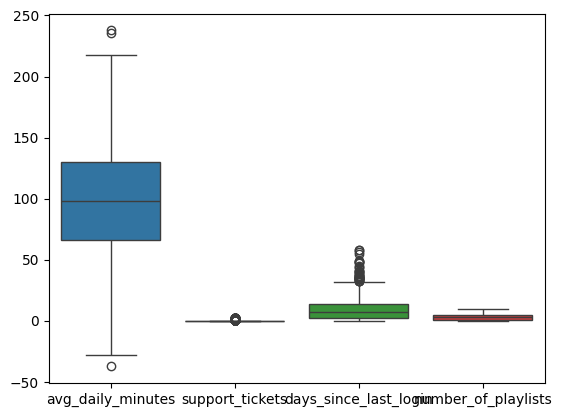

In [12]:
#checking for outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df[['avg_daily_minutes', 'support_tickets', 'days_since_last_login', 'number_of_playlists']])
plt.show()

In [13]:
q1 = df['avg_daily_minutes'].quantile(0.25)
q3 = df['avg_daily_minutes'].quantile(0.75)

iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

outliers = df[(df['avg_daily_minutes'] < lower_bound) | (df['avg_daily_minutes'] > upper_bound)]
print(outliers)

      user_id subscription_type country  avg_daily_minutes  \
57    user_58           Premium      RU              235.6   
70    user_71              Free      PK              -37.2   
757  user_758           Premium      BR              237.8   

     number_of_playlists top_genre  skips_per_day  support_tickets  \
57                     7       Pop              7                0   
70                     0   Country              4                0   
757                    5   Hip-Hop              3                0   

     days_since_last_login  churned  
57                      15        0  
70                       5        0  
757                      5        0  


In [14]:
q1 = df['days_since_last_login'].quantile(0.25)
q3 = df['days_since_last_login'].quantile(0.75)

iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

outliers = df[(df['days_since_last_login'] < lower_bound) | (df['days_since_last_login'] > upper_bound)]
print(outliers)

      user_id subscription_type country  avg_daily_minutes  \
10    user_11           Premium      UK              126.3   
29    user_30              Free      FR               72.1   
50    user_51              Free      US               53.3   
63    user_64              Free      FR               40.5   
96    user_97           Premium      UK              126.7   
133  user_134           Premium      IN               94.1   
164  user_165           Premium      RU              167.8   
207  user_208           Premium      DE              133.8   
209  user_210           Premium      IN               81.7   
223  user_224           Premium      AU              103.3   
245  user_246           Premium      PK              118.0   
250  user_251           Premium      PK               82.5   
268  user_269              Free      AU               40.5   
280  user_281           Premium      RU               81.2   
290  user_291              Free      FR               93.2   
325  use

In [15]:
q1 = df['number_of_playlists'].quantile(0.25)
q3 = df['number_of_playlists'].quantile(0.75)

iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

outliers = df[(df['number_of_playlists'] < lower_bound) | (df['number_of_playlists'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [user_id, subscription_type, country, avg_daily_minutes, number_of_playlists, top_genre, skips_per_day, support_tickets, days_since_last_login, churned]
Index: []


In [16]:
#removing records with negative 'avg daily minutes'

df= df[df['avg_daily_minutes']>=0]

In [17]:
#checking dataset after removing

df.shape

(993, 10)

In [18]:
df[df['avg_daily_minutes']<0]

,user_id,subscription_type,country,avg_daily_minutes,number_of_playlists,top_genre,skips_per_day,support_tickets,days_since_last_login,churned


In [19]:
#checking how churn is spread across country

result = df[df['churned'] == 1].groupby('country')['user_id'].nunique()
print(result)

country
AU    27
BR    15
CA    22
DE    23
FR    15
IN    18
PK    16
RU    16
UK    10
US    21
Name: user_id, dtype: int64


In [20]:
#checking how churn is spread across user's top genre

result= df[df['churned']==1].groupby('top_genre')['user_id'].nunique()
print(result)

top_genre
Classical     27
Country       32
Electronic    29
Hip-Hop       31
Jazz          27
Pop           12
Rock          25
Name: user_id, dtype: int64


In [21]:
#dropping country and genre columns

df = df.drop(columns= ['country', 'top_genre'])

In [22]:
df.columns

Index(['user_id', 'subscription_type', 'avg_daily_minutes',
       'number_of_playlists', 'skips_per_day', 'support_tickets',
       'days_since_last_login', 'churned'],
      dtype='object')

In [23]:
df = pd.get_dummies(df, columns=['subscription_type'], drop_first=True)

In [24]:
df.head()

,user_id,avg_daily_minutes,number_of_playlists,skips_per_day,support_tickets,days_since_last_login,churned,subscription_type_Premium
0,user_1,134.9,4,6,0,1,0,True
1,user_2,165.7,5,8,0,12,0,True
2,user_3,45.9,3,3,0,3,0,False
3,user_4,106.0,0,7,0,3,0,True
4,user_5,89.6,5,2,1,6,0,True


In [25]:
#assigning factor and target variables

x=df.drop(columns = ['user_id', 'churned'])
y= df['churned']

In [26]:
#test and train splt

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [27]:
#fitting a decision tree

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)



In [28]:
#checking accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8442211055276382


In [29]:
#checking the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       158
           1       0.75      0.37      0.49        41

    accuracy                           0.84       199
   macro avg       0.80      0.67      0.70       199
weighted avg       0.83      0.84      0.82       199



In [30]:
model = DecisionTreeClassifier(max_depth = 5, class_weight='balanced', random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77       158
           1       0.37      0.76      0.50        41

    accuracy                           0.68       199
   macro avg       0.64      0.71      0.63       199
weighted avg       0.80      0.68      0.71       199



In [31]:
#trying out random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, max_depth =5, class_weight = 'balanced', random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.93      0.77      0.84       158
           1       0.46      0.78      0.58        41

    accuracy                           0.77       199
   macro avg       0.70      0.77      0.71       199
weighted avg       0.83      0.77      0.79       199



In [32]:
#trying out boosting

from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight = 3.8, learning_rate = 0.05, max_depth = 6, n_estimators = 100, random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       158
           1       0.47      0.59      0.52        41

    accuracy                           0.78       199
   macro avg       0.68      0.71      0.69       199
weighted avg       0.80      0.78      0.79       199



In [33]:
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight = 3.8, learning_rate = 0.01, max_depth = 3, n_estimators = 500, random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       158
           1       0.41      0.71      0.52        41

    accuracy                           0.73       199
   macro avg       0.66      0.72      0.67       199
weighted avg       0.81      0.73      0.76       199



In [34]:
#checking if the data is overfitting or underfitting

train_preds = model.predict(x_train)
print("--- Training Report ---")
print(classification_report(y_train, train_preds))

# Check Test Performance
test_preds = model.predict(x_test)
print("--- Test Report ---")
print(classification_report(y_test, test_preds))

--- Training Report ---
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       652
           1       0.45      0.87      0.59       142

    accuracy                           0.79       794
   macro avg       0.71      0.82      0.72       794
weighted avg       0.87      0.79      0.81       794

--- Test Report ---
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       158
           1       0.41      0.71      0.52        41

    accuracy                           0.73       199
   macro avg       0.66      0.72      0.67       199
weighted avg       0.81      0.73      0.76       199



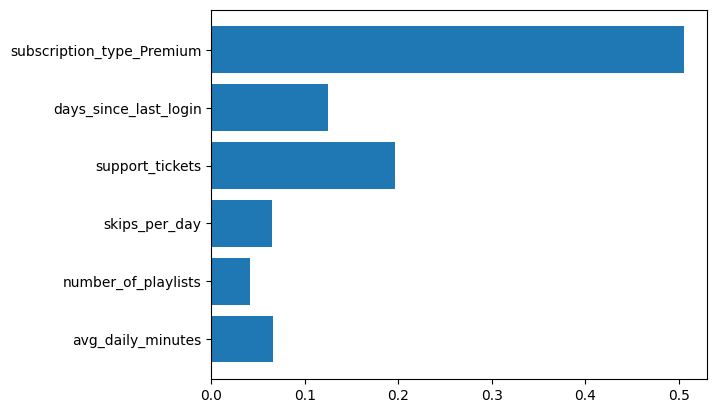

In [35]:
#checking feature importances

importances = model.feature_importances_
feature_names = x_train.columns

feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.show()

In [36]:
#dropping subscription type and running the model again

In [37]:
x=df.drop(columns = ['user_id', 'churned', 'subscription_type_Premium'])
y= df['churned']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       158
           1       0.55      0.29      0.38        41

    accuracy                           0.80       199
   macro avg       0.69      0.61      0.63       199
weighted avg       0.78      0.80      0.78       199



In [41]:
model = RandomForestClassifier(n_estimators = 100, max_depth =5, class_weight = 'balanced', random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       158
           1       0.38      0.59      0.46        41

    accuracy                           0.72       199
   macro avg       0.63      0.67      0.64       199
weighted avg       0.77      0.72      0.74       199



In [42]:
model = XGBClassifier(scale_pos_weight = 3.8, learning_rate = 0.01, max_depth = 3, n_estimators = 500, random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       158
           1       0.41      0.71      0.52        41

    accuracy                           0.73       199
   macro avg       0.66      0.72      0.67       199
weighted avg       0.81      0.73      0.76       199



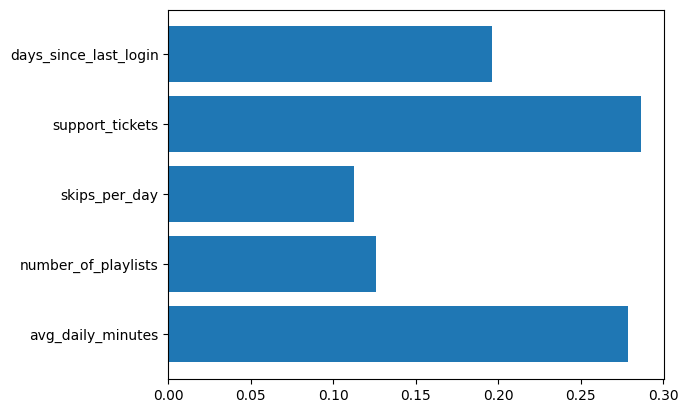

In [43]:
importances = model.feature_importances_
feature_names = x_train.columns

feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.show()

In [49]:
# increasing the probability threshold

preds = model.predict_proba(x_test)[:, 1]
higher_threshold_preds = (preds > 0.4).astype(int)

print(classification_report(y_test, higher_threshold_preds))


              precision    recall  f1-score   support

           0       0.97      0.67      0.79       158
           1       0.42      0.93      0.58        41

    accuracy                           0.72       199
   macro avg       0.70      0.80      0.69       199
weighted avg       0.86      0.72      0.75       199



In [48]:
from sklearn.metrics import precision_score, recall_score

# Get the probabilities
probs = model.predict_proba(x_test)[:, 1]

# Test different thresholds
results = []
for t in [0.4, 0.5, 0.55, 0.6, 0.65, 0.7]:
    preds = (probs > t).astype(int)
    p = precision_score(y_test, preds)
    r = recall_score(y_test, preds)
    results.append({'Threshold': t, 'Precision': p, 'Recall': r})

df_results = pd.DataFrame(results)
print(df_results)

   Threshold  Precision    Recall
0       0.40   0.422222  0.926829
1       0.50   0.414286  0.707317
2       0.55   0.423729  0.609756
3       0.60   0.468085  0.536585
4       0.65   0.461538  0.439024
5       0.70   0.600000  0.365854
